### **📝 PyMC 5 Setup on macOS (Conda Environment)**
This document outlines the step-by-step setup of **PyMC 5** on **macOS** using Conda.

---

### **📌 Step 1: Activate the Conda Environment**
Ensure you are inside the correct Conda environment:

```bash
conda activate baysian_analysis
```
To verify the environment, run:
```bash
conda info --envs
```
The active environment should have a `*` next to `baysian_analysis`.

---

### **📌 Step 2: Check PyMC and Aesara Versions**
Ensure that **PyMC and Aesara** are installed and correctly configured:

```python
import pymc as pm
import aesara

print(f"PyMC version: {pm.__version__}")
print(f"Aesara version: {aesara.__version__}")
```
✅ **Expected Output**:
```
PyMC version: 5.x.x
Aesara version: 2.x.x
```
If you get an error like `ModuleNotFoundError: No module named 'pymc'`, install PyMC using:
```bash
conda install -c conda-forge pymc
```

---

### **📌 Step 3: Check BLAS Configuration**
BLAS (Basic Linear Algebra Subprograms) is critical for PyMC’s backend computations.

Check if Aesara has detected BLAS:
```python
import aesara
print(f"BLAS settings: {aesara.config.blas__ldflags}")
```
✅ **Expected Output** (Example):
```
BLAS settings: -L/opt/anaconda3/envs/baysian_analysis/lib -lmkl_core -lmkl_intel_thread -lmkl_rt -Wl,-rpath,/opt/anaconda3/envs/baysian_analysis/lib
```
If the output is **empty** or you get a **KeyError**, install OpenBLAS:
```bash
conda install -c conda-forge openblas
```
Then, reset Aesara’s configuration:
```python
python -c "import aesara; aesara.config.defaults()"
```

---

### **📌 Step 4: Install and Verify Graphviz**
Graphviz is required for visualizing PyMC computational graphs.

**Check if Graphviz is installed:**
```python
import graphviz
print("Graphviz is installed correctly!")
```
If you get an error (`ModuleNotFoundError: No module named 'graphviz'`), install it using:
```bash
conda install -c conda-forge graphviz python-graphviz
```

---

### **📌 Step 5: Run a Simple PyMC Model**
To verify that **PyMC is running correctly**, execute this simple Bayesian model:

```python
import pymc as pm

with pm.Model() as model:
    # Prior belief: Probability of heads follows a uniform Beta distribution
    p = pm.Beta("p", alpha=1, beta=1)

    # Observed data: 3 heads in 10 coin flips
    obs = pm.Binomial("obs", n=10, p=p, observed=3)

    # Sample from the posterior distribution
    trace = pm.sample(1000, return_inferencedata=True)

print(trace)
```
✅ **Expected Output**:
- No errors.
- Progress bar showing sampling (`100% [1000/1000]`).
- A summary of the posterior samples.

---

### **✅ Setup Complete! 🎉**
Your **PyMC environment is now fully functional!** 🚀  
If you run into any issues, check error messages and reinstall missing dependencies using Conda.

---



# Examples to enhance pymc skills and knowledge


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pymc as pm
import arviz as az


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 1. Introduction to PyMC

###  visulaizing the computational graph of a simple model

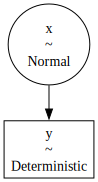

In [3]:
import pymc as pm
import aesara.tensor as at

with pm.Model() as model:
    # Prior distribution: X follows a Normal(0, 1)
    x = pm.Normal("x", mu=0, sigma=1)

    # Deterministic transformation: Y = X²
    y = pm.Deterministic("y", x**2)  

# Display the computational graph
pm.model_to_graphviz(model)


### Example 1: A Simple Bayesian Model to Estimate the percentage of water on earth with PyMC
### Example 1: A Simple Bayesian Model to Estimate the Percentage of Water on Earth with PyMC

**Experiment Description:**
- We have a globe that we spin and drop randomly
- Each time it lands, we record whether it shows water or land
- Our goal: Estimate what percentage of Earth's surface is covered by water

**Bayesian Approach:**
1. **Prior**: We start with a uniform prior (Beta(1,1)) - any water percentage from 0-100% is equally likely
2. **Data Collection**: We observe outcomes from spinning the globe
3. **Posterior**: We update our belief about water coverage based on observed data

**What We'll Explore:**
- How our estimate improves as we collect more data:
    - First with 10 spins
    - Then with 100 more spins
    - Finally with 1000 more spins
- How the posterior distribution becomes narrower (more certain) with increasing data
- Proper vs. improper ways to update our Bayesian model with new information


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 100 tune and 1_000 draw iterations (400 + 4_000 draws total) took 28 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 100 tune and 1_000 draw iterations (400 + 4_000 draws total) took 29 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 100 tune and 1_000 draw iterations (400 + 4_000 draws total) took 27 seconds.


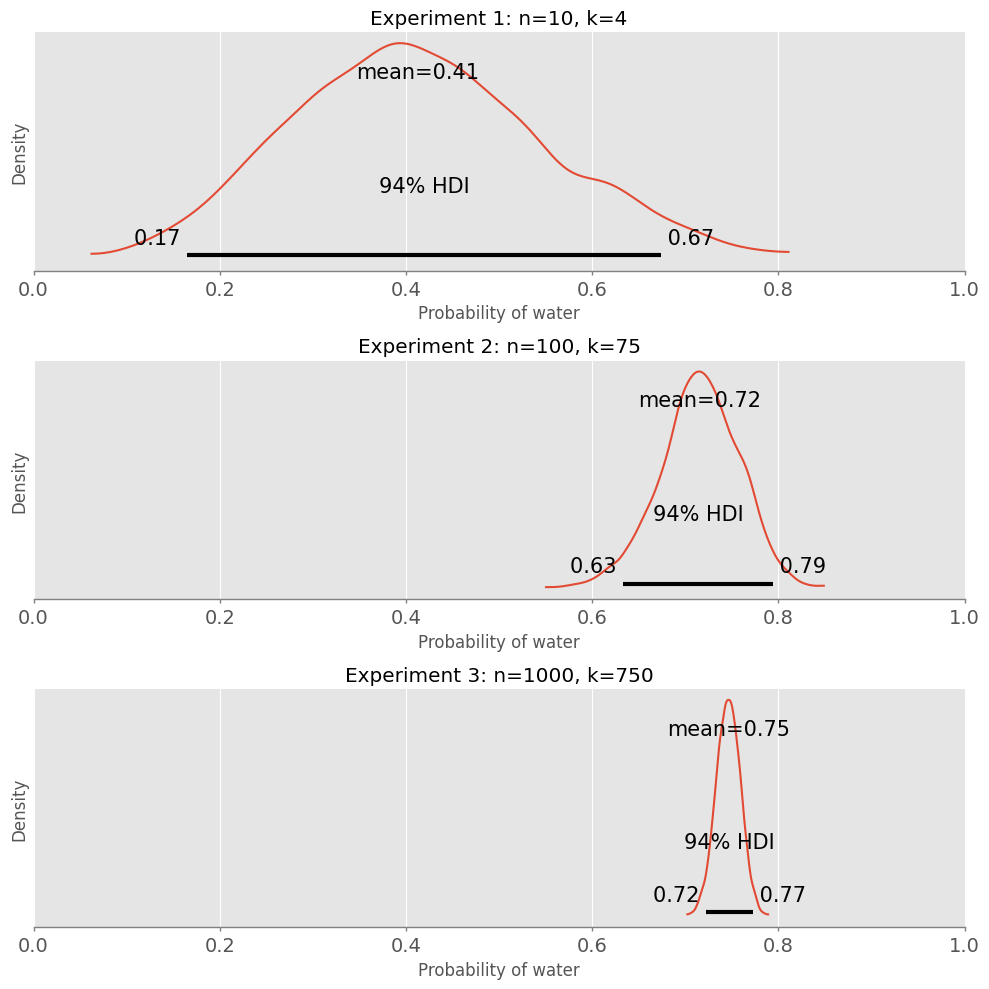

In [8]:
# First experiment: 10 tosses of globe with 4 lands on water and 6 on land
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Define experiments as a list of tuples (n, k) where n is number of trials and k is number of water observations
experiments = [(10, 4), (100, 75), (1000, 750)]
posteriors = []

curren_n,current_k = 0,0
for n, k in experiments:
    with pm.Model() as model:
        # Prior for probability of water
        p = pm.Uniform("p", lower=0, upper=1)
        
        # Binomial likelihood - directly use k as the observed value

        curren_n,current_k = curren_n+n,current_k+k
        water = pm.Binomial("water", n=curren_n, p=p, observed=current_k)
        
        # Sample from the posterior
        trace = pm.sample(1000, tune=100, return_inferencedata=True)
        posteriors.append(trace)

# Plot all three posteriors
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
plt.style.use("ggplot")

for i, trace in enumerate(posteriors):
    az.plot_posterior(trace, var_names=["p"], ax=axes[i])
    axes[i].set_title(f"Experiment {i+1}: n={experiments[i][0]}, k={experiments[i][1]}")
    axes[i].set_xlabel("Probability of water")
    axes[i].set_ylabel("Density")
    axes[i].set_xlim(0, 1)

plt.tight_layout()
plt.show()



*interpretation of the results*
- The posterior distribution becomes narrower and more certain as we collect more data
- The peak of the posterior shifts towards the true value (70% water)
- The 95% credible interval becomes narrower and more accurate with more data


In [2]:
import pymc as pm

with pm.Model() as coin_model:
    # Prior belief: Probability of heads follows a uniform Beta distribution
    p = pm.Beta("p", alpha=1, beta=1)  # Prior: Any value between 0-1 is equally likely

    # Observed data: We flipped the coin 10 times and got 3 heads
    obs = pm.Binomial("obs", n=10, p=p, observed=3)

    # Perform Bayesian inference: Sample from the posterior
    trace = pm.sample(1000, return_inferencedata=True)



/opt/anaconda3/envs/baysian_analysis/lib/python3.8/site-packages/multipledispatch/dispatcher.py:27: AmbiguityWarning: 
Ambiguities exist in dispatched function _unify

The following signatures may result in ambiguous behavior:
	[object, ConstrainedVar, Mapping], [ConstrainedVar, Var, Mapping]
	[ConstrainedVar, object, Mapping], [object, ConstrainedVar, Mapping]
	[ConstrainedVar, Var, Mapping], [object, ConstrainedVar, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]


Consider making the following additions:

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jo

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.


<Axes: title={'center': 'p'}>

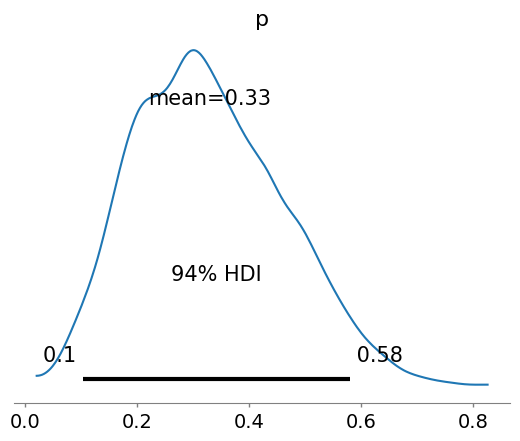

In [3]:
import arviz as az

# Plot posterior distribution of p
az.plot_posterior(trace, var_names=["p"])


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.


<Axes: title={'center': 'p'}>

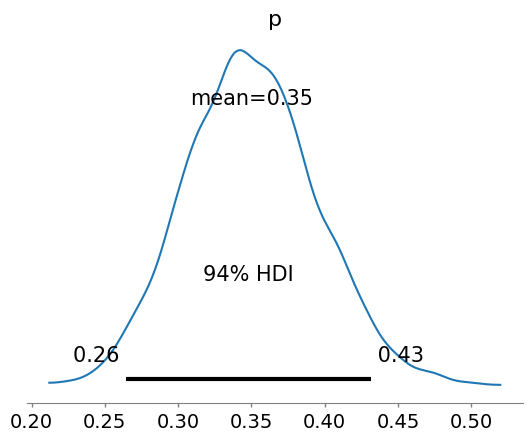

In [6]:
# updatae the model with new data trials 100 and heads 35
with coin_model:
    new_obs = pm.Binomial("new_obs", n=100, p=p, observed=35)
    new_trace = pm.sample(1000, return_inferencedata=True)


# Plot posterior distribution of p
az.plot_posterior(new_trace, var_names=["p"])

## Updating the data the wrong way, you must use the previous posterios as a new preior, usually you fit the data to the new distribution

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.


<Axes: title={'center': 'p'}>

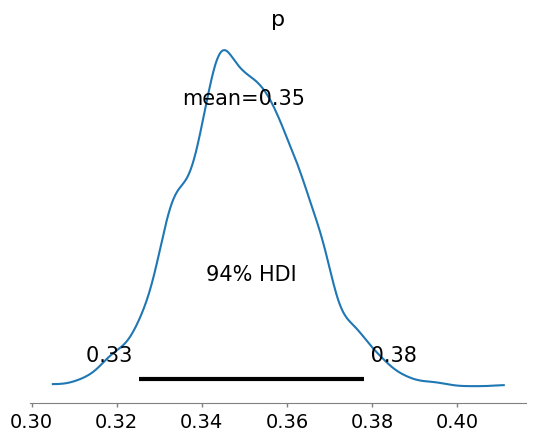

In [ ]:
# update the existing  model with new data trials 1000 and heads 350 
##############
with coin_model:
    new_obs = pm.Binomial("new_obs2", n=1000, p=p, observed=350)
    new_trace = pm.sample(1000, return_inferencedata=True)

# Plot posterior distribution of p
az.plot_posterior(new_trace, var_names
                 =["p"])


In [9]:
# save the model for later then load it and update with the new data    
az.to_netcdf(trace, "coin_trace.nc")


'coin_trace.nc'

Fitted Beta parameters: alpha=3.82, beta=7.82


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.


NameError: name 'plt' is not defined

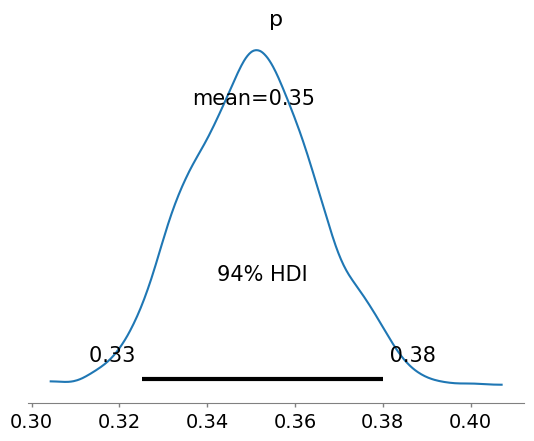

In [ ]:
import numpy as np
import scipy.stats as st

# Assume `trace` is from your original model
prev_samples = trace.posterior["p"].values.flatten()


# Fit a Beta distribution to the previous samples
a, b, loc, scale = st.beta.fit(prev_samples, floc=0, fscale=1)
print(f"Fitted Beta parameters: alpha={a:.2f}, beta={b:.2f}")


with pm.Model() as sequential_model:
    # Use the fitted Beta distribution as the new prior for p
    p = pm.Beta("p", alpha=a, beta=b)
    
    # New observed data only: 1000 trials, 350 heads
    new_obs = pm.Binomial("new_obs", n=1000, p=p, observed=350)
    
    # Sample from the updated posterior
    trace_seq = pm.sample(1000, return_inferencedata=True)

az.plot_posterior(trace_seq, var_names=["p"])


"""""
Option2 Cumulative Data Model (very simple)
One straightforward method is to simply redefine your model with the cumulative totals of your data. For example:

total_flips = 10 + 1000   # Old + new trials
total_heads = 3 + 350     # Old + new heads

with pm.Model() as cumulative_model:
    p = pm.Beta("p", alpha=1, beta=1)  # Same initial prior
    obs = pm.Binomial("obs", n=total_flips, p=p, observed=total_heads)
    trace_cumulative = pm.sample(1000, return_inferencedata=True)

import arviz as az
az.plot_posterior(trace_cumulative, var_names=["p"])

"""
